In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time

In [2]:
pd.read_csv('Data/games.csv')

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-12-19,12000047,Final,1610612753,1610612766,2020,1610612753,120.0,0.433,0.792,...,23.0,50.0,1610612766,117.0,0.444,0.864,0.439,21.0,52.0,1
1,2020-12-19,12000048,Final,1610612764,1610612765,2020,1610612764,99.0,0.427,0.625,...,24.0,45.0,1610612765,96.0,0.402,0.647,0.326,18.0,51.0,1
2,2020-12-19,12000049,Final,1610612763,1610612737,2020,1610612763,116.0,0.400,0.744,...,21.0,43.0,1610612737,117.0,0.422,0.837,0.297,24.0,47.0,0
3,2020-12-18,12000039,Final,1610612754,1610612755,2020,1610612754,107.0,0.371,0.692,...,19.0,45.0,1610612755,113.0,0.533,0.629,0.355,23.0,48.0,0
4,2020-12-18,12000040,Final,1610612761,1610612748,2020,1610612761,105.0,0.380,0.737,...,27.0,37.0,1610612748,117.0,0.534,0.741,0.514,30.0,51.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
23516,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
23517,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
23518,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [6]:
##2.1 Exploration des données
GAME_COLS  =['GAME_ID','PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away',	'AST_away',	'REB_away','HOME_TEAM_WINS']
data = pd.read_csv('Data/games.csv', usecols = GAME_COLS)
data

,GAME_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,12000047,120.0,0.433,0.792,0.425,23.0,50.0,0.444,0.864,0.439,21.0,52.0,1
1,12000048,99.0,0.427,0.625,0.295,24.0,45.0,0.402,0.647,0.326,18.0,51.0,1
2,12000049,116.0,0.400,0.744,0.396,21.0,43.0,0.422,0.837,0.297,24.0,47.0,0
3,12000039,107.0,0.371,0.692,0.262,19.0,45.0,0.533,0.629,0.355,23.0,48.0,0
4,12000040,105.0,0.380,0.737,0.356,27.0,37.0,0.534,0.741,0.514,30.0,51.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,11400007,93.0,0.419,0.821,0.421,24.0,50.0,0.366,0.643,0.375,17.0,43.0,1
23516,11400004,81.0,0.338,0.719,0.381,18.0,40.0,0.411,0.636,0.267,17.0,47.0,0
23517,11400005,98.0,0.448,0.682,0.500,29.0,45.0,0.387,0.659,0.500,19.0,43.0,1
23518,11400002,99.0,0.440,0.771,0.333,21.0,30.0,0.469,0.725,0.385,18.0,45.0,1


In [7]:
## Calcul des tableaux
homeWin = data.loc[:,"HOME_TEAM_WINS"]
reboundHWin = []
reboundAWin = []
reboundHLoose = []
reboundALoose = []
assistHWin = []
assistAWin = []
assistHLoose = []
assistALoose = []
ptsHWin = []
ptsHLoose = []
freeThrowHWin = []
freeThrowAWin = []
freeThrowHLoose = []
freeThrowALoose = []
fieldGoalHWin = []
fieldGoalAWin = []
fieldGoalHLoose = []
fieldGoalALoose = []
fieldGoal3HWin = []
fieldGoal3AWin = []
fieldGoal3HLoose = []
fieldGoal3ALoose = []
i = 0
for x in homeWin:
    if x == 1:
        #Rebounds
        reboundHWin.append(data.loc[i,"REB_home"])
        reboundALoose.append(data.loc[i,"REB_away"])
        #Assists
        assistHWin.append(data.loc[i,"AST_home"])
        assistALoose.append(data.loc[i,"AST_away"])  
        #Free Throws
        freeThrowHWin.append(data.loc[i,"FT_PCT_home"]*100)
        freeThrowALoose.append(data.loc[i,"FT_PCT_away"]*100)
        #Field Goal
        fieldGoalHWin.append(data.loc[i,"FG_PCT_home"]*100)
        fieldGoalALoose.append(data.loc[i,"FG_PCT_away"]*100)
        #Field Goal 3
        fieldGoal3HWin.append(data.loc[i,"FG3_PCT_home"]*100)
        fieldGoal3ALoose.append(data.loc[i,"FG3_PCT_away"]*100)

        ptsHWin.append(data.loc[i,"PTS_home"])
    else:
        #Rebounds
        reboundHLoose.append(data.loc[i,"REB_home"])
        reboundAWin.append(data.loc[i,"REB_away"])
        #Assists
        assistHLoose.append(data.loc[i,"AST_home"])
        assistAWin.append(data.loc[i,"AST_away"])
        #Free Throws
        freeThrowHLoose.append(data.loc[i,"FT_PCT_home"]*100)
        freeThrowAWin.append(data.loc[i,"FT_PCT_away"]*100)
        #Field Goal 
        fieldGoalHLoose.append(data.loc[i,"FG_PCT_home"]*100)
        fieldGoalAWin.append(data.loc[i,"FG_PCT_away"]*100)
        #Field Goal 3
        fieldGoal3HLoose.append(data.loc[i,"FG3_PCT_home"]*100)
        fieldGoal3AWin.append(data.loc[i,"FG3_PCT_away"]*100)
       
        ptsHLoose.append(data.loc[i,"PTS_home"])
    i = i + 1

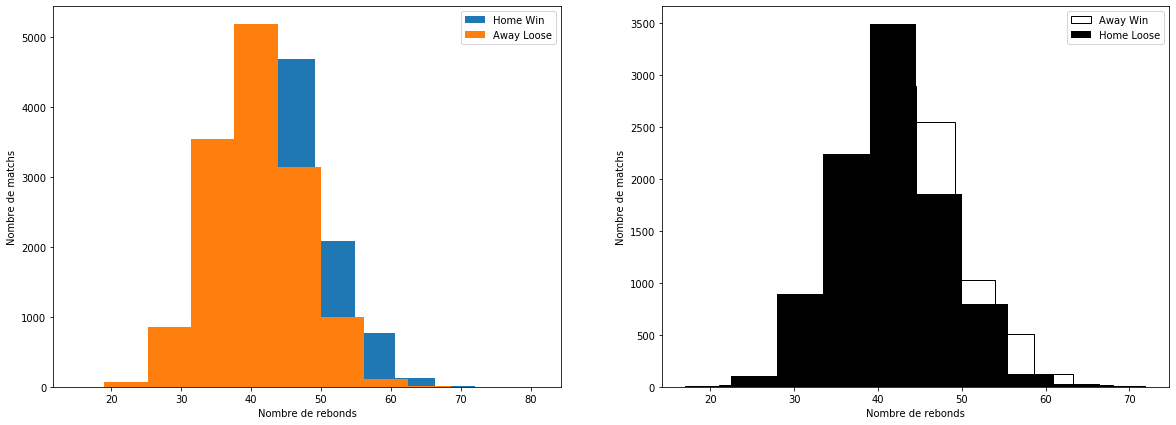

In [49]:
fig = plt.figure(1, figsize=(20,7))

#home
plt.subplot(1,2,1)
plt.xlabel('Nombre de rebonds')
plt.ylabel('Nombre de matchs')
plt.hist(reboundHWin, label='Home Win')
plt.hist(reboundALoose, label= 'Away Loose')
plt.legend()
#On remarque que quand home fait des rebonds elle gagne plus souvent et plus le nombre de rebond est élevé plus elle gagne

#away
plt.subplot(1,2,2)
plt.xlabel('Nombre de rebonds')
plt.ylabel('Nombre de matchs')
plt.hist(reboundAWin, label='Away Win')
plt.hist(reboundHLoose, label = 'Home Loose')
plt.legend()
#Par contre pour away l'equipe gagne plus quand le nombre de rebond est moins élevé.

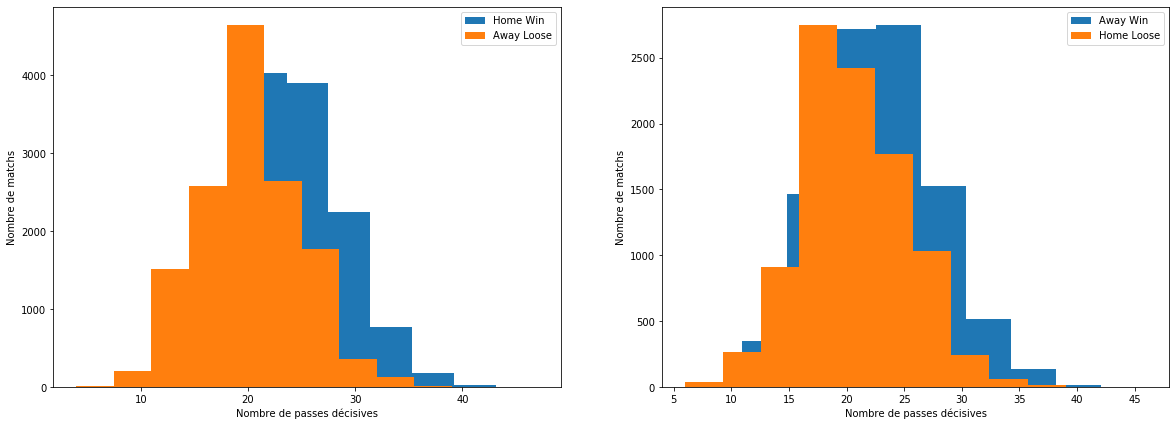

In [6]:
fig = plt.figure(1, figsize=(20,7))

#home
plt.subplot(1,2,1)
plt.xlabel('Nombre de passes décisives')
plt.ylabel('Nombre de matchs')
plt.hist(assistHWin, label='Home Win')
plt.hist(assistALoose, label= 'Away Loose')
plt.legend()
#On remarque quand home gagne les matchs, elle a fait plus de passes décisives

#away
plt.subplot(1,2,2)
plt.xlabel('Nombre de passes décisives')
plt.ylabel('Nombre de matchs')
plt.hist(assistAWin, label='Away Win')
plt.hist(assistHLoose, label= 'Home Loose')
plt.legend()

#Quand away loose son nombre moyen de passes décisives par match est plus bas

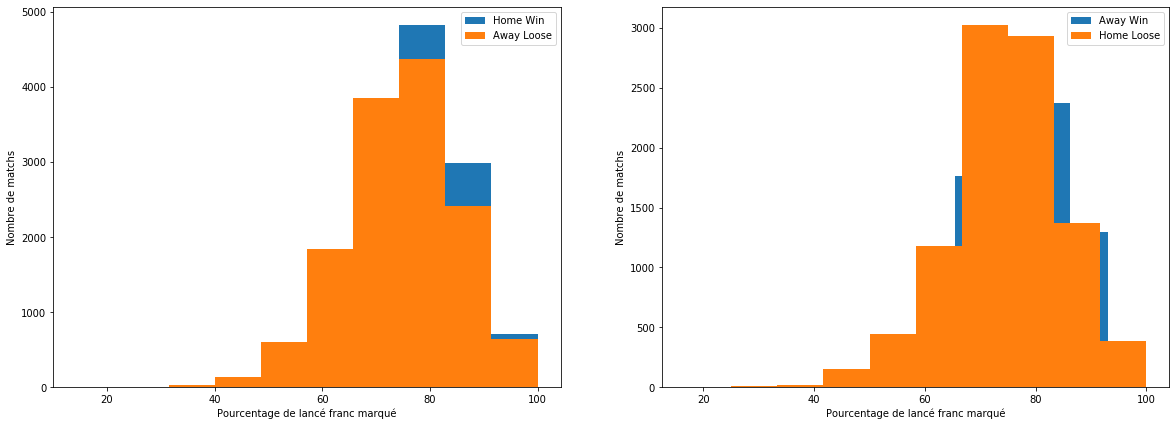

In [7]:
fig = plt.figure(1, figsize=(20,7))

#home
plt.subplot(1,2,1)
plt.xlabel('Pourcentage de lancé franc marqué')
plt.ylabel('Nombre de matchs')
plt.hist(freeThrowHWin, label='Home Win')
plt.hist(freeThrowALoose, label= 'Away Loose')
plt.legend()
#On remarque quand home gagne les matchs, elle a fait plus de passes décisives

#away
plt.subplot(1,2,2)
plt.xlabel('Pourcentage de lancé franc marqué')
plt.ylabel('Nombre de matchs')
plt.hist(freeThrowAWin, label='Away Win')
plt.hist(freeThrowHLoose, label= 'Home Loose')
plt.legend()

#On voit que le nombre de lancé franc n'est pas très représentatif

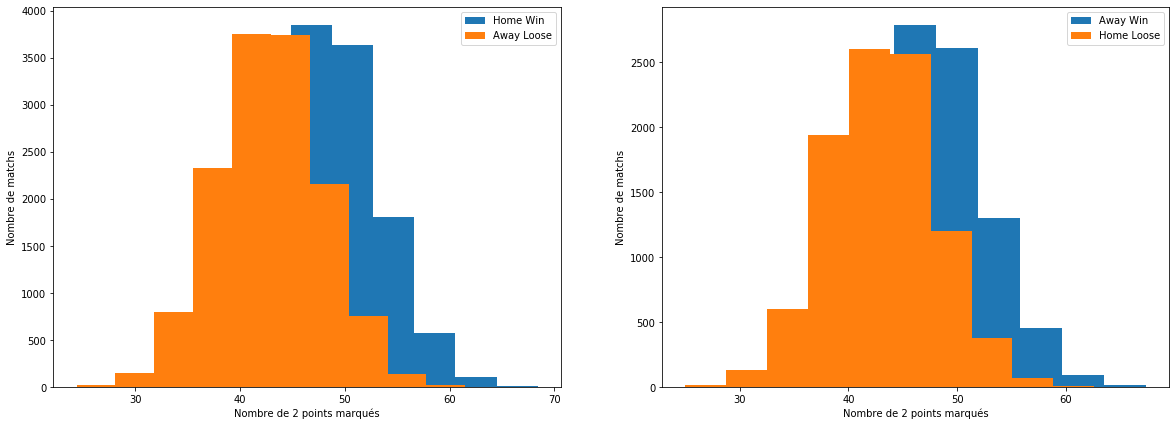

In [8]:
fig = plt.figure(1, figsize=(20,7))
#home
plt.subplot(1,2,1)
plt.xlabel('Nombre de 2 points marqués')
plt.ylabel('Nombre de matchs')
plt.hist(fieldGoalHWin, label='Home Win')
plt.hist(fieldGoalALoose, label= 'Away Loose')
plt.legend()
#On remarque que quand home fait des rebonds elle gagne plus souvent et plus le nombre de rebond est élevé plus elle gagne

#away
plt.subplot(1,2,2)
plt.xlabel('Nombre de 2 points marqués')
plt.ylabel('Nombre de matchs')
plt.hist(fieldGoalAWin, label='Away Win')
plt.hist(fieldGoalHLoose, label = 'Home Loose')
plt.legend()

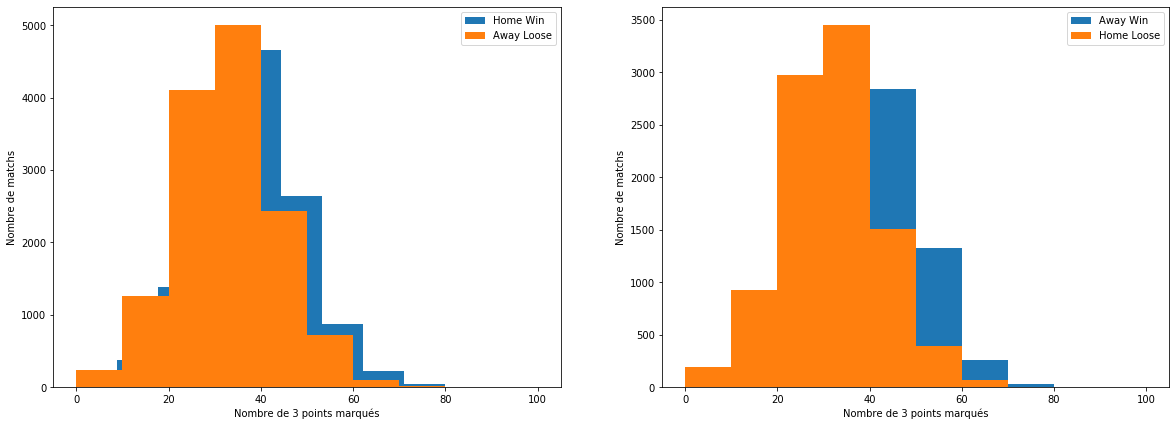

In [9]:
fig = plt.figure(1, figsize=(20,7))
#home
plt.subplot(1,2,1)
plt.xlabel('Nombre de 3 points marqués')
plt.ylabel('Nombre de matchs')
plt.hist(fieldGoal3HWin, label='Home Win')
plt.hist(fieldGoal3ALoose, label= 'Away Loose')
plt.legend()
#On remarque que quand home fait des rebonds elle gagne plus souvent et plus le nombre de rebond est élevé plus elle gagne

#away
plt.subplot(1,2,2)
plt.xlabel('Nombre de 3 points marqués')
plt.ylabel('Nombre de matchs')
plt.hist(fieldGoal3AWin, label='Away Win')
plt.hist(fieldGoal3HLoose, label = 'Home Loose')
plt.legend()

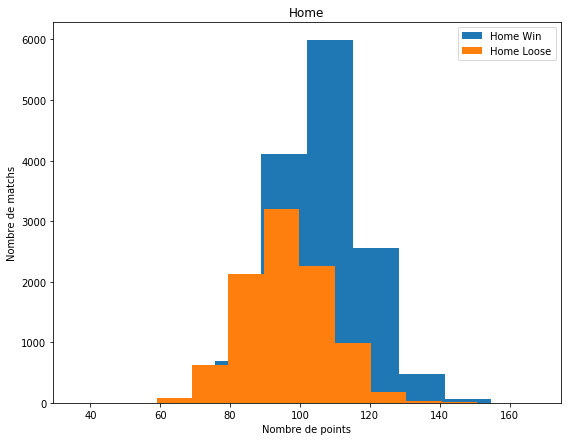

In [10]:
fig = plt.figure(1, figsize=(20,7))

plt.subplot(1,2,1)
plt.xlabel('Nombre de points')
plt.ylabel('Nombre de matchs')
plt.hist(ptsHWin, label='Home Win')
plt.hist(ptsHLoose, label= 'Home Loose')
plt.title("Home")
plt.legend()
#Est-ce que à partir d'un certains nombres de point marqués à domicile on peut ou pas définir qui va gagner ?

In [10]:
#2.3 Pre-processing
#attribution des données pour X et y
#'PTS_home', 
X_ARG  =['FG_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'FG_PCT_away', 'FG3_PCT_away','AST_away',	'REB_away']
y_ARG =['HOME_TEAM_WINS']
X = pd.read_csv('Data/games.csv', usecols = X_ARG)
y = pd.read_csv('Data/games.csv', usecols = y_ARG)

#Normalisation "min-max"
def minmax_norm(Data_input):
    return (Data_input - Data_input.min()) / ( Data_input.max() - Data_input.min())

#Normalisation "moyenne"
def mean_norm(Data_input):
    return Data_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

#Valeurs plus exploitables avec la methode min-max
X_normalized = minmax_norm(X)
# X_normalized = mean_norm(X)
X_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23520 entries, 0 to 23519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FG_PCT_home   23421 non-null  float64
 1   FG3_PCT_home  23421 non-null  float64
 2   AST_home      23421 non-null  float64
 3   REB_home      23421 non-null  float64
 4   FG_PCT_away   23421 non-null  float64
 5   FG3_PCT_away  23421 non-null  float64
 6   AST_away      23421 non-null  float64
 7   REB_away      23421 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


In [11]:
#On donne la bonne shape a y pour la cross validation et le fit
newY = np.zeros(23520)
for i in range(0,23520):
    newY[i] = y.iat[i, 0]
y.shape, newY.shape

# Faire la moyenne des valeurs de chaque colonne.
Xmoy = X_normalized.mean()
# On fill les valeurs : NaN.
X_normalized = X_normalized.fillna(value=Xmoy)

# On verifie que toutes les valeurs du data set sont propre. 
# Résultat attendu (True, False)
np.all(np.isfinite(X_normalized)), np.any(X_normalized.isna())
X_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23520 entries, 0 to 23519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FG_PCT_home   23520 non-null  float64
 1   FG3_PCT_home  23520 non-null  float64
 2   AST_home      23520 non-null  float64
 3   REB_home      23520 non-null  float64
 4   FG_PCT_away   23520 non-null  float64
 5   FG3_PCT_away  23520 non-null  float64
 6   AST_away      23520 non-null  float64
 7   REB_away      23520 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


In [23]:
#2.4 Optimisation
#En premier, on utilise la cross validation et on definit la valeur des hyper-parametres (c) du modele
lScore = []
for c in range(1,10):
    clf1 = svm.SVC(C = c,kernel = 'linear')
    scores = cross_val_score(clf1, X_normalized, newY, cv=4)
    print('On obtient les scores suivant avec C= ' + str(c) + ' : ' + str(scores))
    lScore.append(scores[3])
    
print('On obtient le score test suivant pour chaque c : ' + str(lScore))
#score satisfaisant mais pas très haut

On obtient les scores suivant avec C= 1 : [0.83860544 0.83095238 0.8079932  0.83469388]
On obtient les scores suivant avec C= 2 : [0.83860544 0.83095238 0.8079932  0.83452381]
On obtient les scores suivant avec C= 3 : [0.83843537 0.83129252 0.80833333 0.83469388]
On obtient les scores suivant avec C= 4 : [0.83877551 0.83078231 0.80782313 0.83435374]
On obtient les scores suivant avec C= 5 : [0.83894558 0.83095238 0.80782313 0.83469388]
On obtient les scores suivant avec C= 6 : [0.83894558 0.83078231 0.80748299 0.83452381]
On obtient les scores suivant avec C= 7 : [0.83860544 0.83044218 0.80782313 0.83520408]
On obtient les scores suivant avec C= 8 : [0.83860544 0.83044218 0.80782313 0.83520408]
On obtient les scores suivant avec C= 9 : [0.83860544 0.83078231 0.8079932  0.83503401]
On obtient le score test suivant pour chaque c : [0.8346938775510204, 0.8345238095238096, 0.8346938775510204, 0.8343537414965987, 0.8346938775510204, 0.8345238095238096, 0.835204081632653, 0.835204081632653, 

No handles with labels found to put in legend.


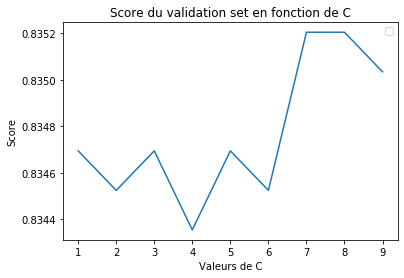

In [24]:
C = [1,2,3,4,5,6,7,8,9]
plt.plot(C,lScore) 
plt.ylabel('Score')
plt.xlabel('Valeurs de C')
plt.title('Score du validation set en fonction de C')
plt.legend()

In [26]:
lScore = []
for c in range(2,10):
    clf1 = svm.SVC(C = 1,kernel = 'linear')
    scores = cross_val_score(clf1, X_normalized, newY, cv=c)
    print('On obtient les scores suivant avec cv= ' + str(c) + ' : ' + str(scores))
    lScore.append(scores[c-1])
    
print('On obtient le score de test suivant pour chaque cv : ' + str(lScore))

On obtient les scores suivant avec cv= 2 : [0.83630952 0.8212585 ]
On obtient les scores suivant avec cv= 3 : [0.84068878 0.81836735 0.82576531]
On obtient les scores suivant avec cv= 4 : [0.83860544 0.83095238 0.8079932  0.83469388]
On obtient les scores suivant avec cv= 5 : [0.83652211 0.83864796 0.8167517  0.81271259 0.83567177]
On obtient les scores suivant avec cv= 6 : [0.8377551  0.84132653 0.82576531 0.81173469 0.81556122 0.83622449]
On obtient les scores suivant avec cv= 7 : [0.83809524 0.83928571 0.83214286 0.81904762 0.79880952 0.83363095
 0.83571429]
On obtient les scores suivant avec cv= 8 : [0.83843537 0.83911565 0.83843537 0.8255102  0.80816327 0.80646259
 0.83571429 0.8329932 ]
On obtient les scores suivant avec cv= 9 : [0.8358837  0.83779648 0.8462127  0.82740145 0.81515499 0.81362419
 0.80711825 0.8358209  0.83390739]
On obtient le score de test suivant pour chaque cv : [0.8212585034013605, 0.825765306122449, 0.8346938775510204, 0.8356717687074829, 0.8362244897959183, 

No handles with labels found to put in legend.


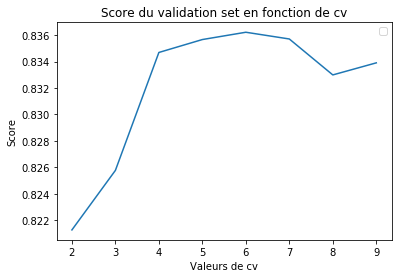

In [27]:
C = [2,3,4,5,6,7,8,9]
plt.plot(C,lScore) 
plt.ylabel('Score')
plt.xlabel('Valeurs de cv')
plt.title('Score du validation set en fonction de cv')
plt.legend()

In [41]:
start_time1 = time.time()
clf1 = svm.SVC(C = 1,kernel = 'linear')
scores = cross_val_score(clf1, X_normalized, newY, cv=4)
print("Validation score : ", scores[3], "& calcul en --- %s seconds ---" % (time.time() - start_time1))

Validation score :  0.8346938775510204 & calcul en --- 7.956667184829712 seconds ---


In [42]:
start_time2 = time.time()
clf2 = svm.SVC(C = 7,kernel = 'linear')
scores = cross_val_score(clf2, X_normalized, newY, cv=4)
print("Validation score : ", scores[3], "& calcul en --- %s seconds ---" % (time.time() - start_time2))

Validation score :  0.835204081632653 & calcul en --- 8.668288707733154 seconds ---


In [ ]:
#En deuxième, on utilise la fonction fit, on regarde la différence avec la cross validation
#générer un entrainement set adéquat.
#générer un validation set adéquat
#Fonction de sklearn
X_train, X_val, y_train, y_val = train_test_split(X_normalized, newY, test_size=0.25, random_state=0)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

In [ ]:
#entrainer le modele avec un fit
clf2 = svm.SVC(C = 1,kernel = 'linear')
clf2.fit(X_train,y_train)
print("training score :" ,clf2.score(X_train,y_train))
print("validation score : ",clf2.score(X_val,y_val))

In [ ]:
#2.4.2 Pre-processing 2
#attribution des données pour X et y
X_ARG  =['PTS_home','FG_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home']
y_ARG =['HOME_TEAM_WINS']
X = pd.read_csv('Data/games.csv', usecols = X_ARG)
y = pd.read_csv('Data/games.csv', usecols = y_ARG)
X_normalized = minmax_norm(X)
newY = np.zeros(23520)
for i in range(0,23520):
    newY[i] = y.iat[i, 0]
y.shape, newY.shape
Xmoy = X_normalized.mean()
X_normalized = X_normalized.fillna(value=Xmoy)
X_train, X_val, y_train, y_val = train_test_split(X_normalized, newY, test_size=0.3, random_state=0)

In [ ]:
lScore = []
for c in range(1,4):
    clf1 = svm.SVC(C = c,kernel = 'linear')
    scores = cross_val_score(clf1, X_normalized, newY, cv=4)
    print('On obtient les scores suivant avec C= ' + str(c) + ' : ' + str(scores))
    lScore.append(np.average(scores))
    
print('On obtient le score moy suivant pour chaque c : ' + str(lScore))